## Latar Belakang
Seorang pengusaha properti yang memiliki beberapa aset berupa rumah dan apartemen berencana untuk menyewakan propertinya melalui platform Airbnb. Namun, ia mengalami kesulitan dalam menentukan area yang paling potensial untuk disewakan di situs tersebut. 

## Pernyataan Masalah
Sebagai pengusaha properti, tujuan utama dalam menyewakan unit properti di platform Airbnb adalah untuk memaksimalkan keuntungan serta memberikan pengalaman yang memuaskan bagi tamu. Lokasi yang strategis dan harga sewa yang kompetitif merupakan faktor penting yang memengaruhi keputusan tamu dalam memilih tempat menginap. Oleh karena itu, pemilik properti perlu memperhatikan keseimbangan antara harga sewa dan lokasi yang ditawarkan.

Sebagai seorang data analyst, saya akan mencoba menjawab pertanyaan utama berikut:
Wilayah atau area mana yang paling potensial dan menguntungkan bagi pemilik properti dalam menyewakan unitnya melalui Airbnb di Kota Bangkok?

## Data
Untuk menjawab pertanyaan masalah di atas, kita akan menganalisis data mengenai listing airbnb di Kota Bangkok.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('Airbnb Listings Bangkok.csv')   


Dataset ini berisi informasi terkait host, neighbourhood (area), tipe unit(room), harga, durasi menginap, review tamu, okupansi, dan jumlah properti per host yang diisi oleh host airbnb di Kota Bangkok. Terdapat 17 kolom pada dataset ini, yang terdiri dari:

* id : ID unik untuk setiap listing properti di Airbnb.
* name : nama properti yang ditampilkan pada website Airbnb.
* host_id : ID unik untuk host (pemilik) yang listing properti di Airbnb.
* host_name : nama host (pemilik) yang listing properti di Airbnb.
* neighbourhood : area atau distrik dari properti yang disewakan.
* latitude : koordinat lintang lokasi properti.
* longitude : koordinat bujur lokasi properti.
* room_type : tipe unit atau kamar yang disewakan. 
* price : harga sewa dari unit atau kamar per malam.
* minimum_nights : Jumlah minimum malam yang harus dipesan tamu.
* number_of_reviews : total review yang diterima oleh pemilik properti.
* last_review : tanggal review terakhir.
* reviews_per_month : rata-rata review yang diterima per bulan.
* calculated host listings count : Jumlah listing lain yang dimiliki oleh host yang sama.
* availability_365 : Jumlah hari dalam setahun di mana properti tersedia untuk disewakan.
* number_of_reviews_ltm : Jumlah review dalam satu tahun terakhir.

Berikut adalah 5 baris teratas dan terbawah dari dataset airbnb listings Bangkok

In [23]:
# Load dataset
df = pd.read_csv("Airbnb Listings Bangkok.csv", low_memory=False)

# Lihat ukuran & kolom
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Understanding and Data Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari kolom pada dataset airbnb_listings_bangkok.

In [24]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

In [25]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []

# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

In [26]:
df.isnull().sum()


Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Secara umum, dapat dilihat bahwa:
* dataset airbnb_listings_Bangkok memiliki 17 kolom dan 15.854 baris
* beberapa kolom, yaitu `host_name`, `number_of_reviews`, `name`, dan `reviews_per_month` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `minimum_nights` memiliki distribusi data yang tidak normal, di mana rata-rata dan median dari kolom tersebut terlampau cukup jauh (15 dan 1 malam).
* kolom `price` memiliki range data yang cukup besar, dari 0-1100000. Dengan asumsi rata-rata harga menginap per malam di Kota Bangkok adalah 3217.70, maka terbukti bahwa masih terdapat data outlier pada kolom `price`.

Untuk menjawab business questions dengan lebih efisien dan relevan, sebagai seorang data analyst perlu untuk menyesuaikan kolom-kolom mana saja yang akan digunakan untuk proses data analysis. Kolom-kolom relevan yang digunakan pada kasus ini untuk menganalisis area yang paling optimal untuk menyewakan airbnb adalah kolom `id`, `name`, `neighbourhood`, `latitude`, `longitude`, `price`, dan `availability_365`.

In [27]:
# Memilih kolom yang digunakan
df = df[['id', 'name', 'neighbourhood', 'latitude', 'longitude', 'price', 'availability_365']]
df.head()


,id,name,neighbourhood,latitude,longitude,price,availability_365
0,27934,Nice room with superb city view,Ratchathewi,13.75983,100.54134,1905,353
1,27979,"Easy going landlord,easy place",Bang Na,13.66818,100.61674,1316,358
2,28745,modern-style apartment in Bangkok,Bang Kapi,13.75232,100.62402,800,365
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,Din Daeng,13.78823,100.57256,1286,323
4,941865,Suite Room 3 at MetroPoint,Bang Kapi,13.76872,100.63338,1905,365


Tahap selanjutnya adalah untuk menghapus data duplikat berdasarkan id agar setiap listing unik. Kemudian, menghapus duplikat yang identik pada kolom `nama`, `lokasi`, dan `harga`. 8 Data kosong pada kolom `name` juga dihapus karena dianggap tidak valid dan tidak terlalu berpengaruh pada analisis data selanjutnya. Setelah tahap ini, jumlah data yang tersisa dicetak untuk memverifikasi hasil pembersihan.

In [28]:
# Hapus duplikat berdasarkan id (karena seharusnya unik)
df.drop_duplicates(subset='id', inplace=True)

# Hapus duplikat yang identik (nama, lokasi, dan harga sama persis)
df.drop_duplicates(subset=['name', 'latitude', 'longitude', 'price'], inplace=True)


print("Sisa data setelah hapus duplikat:", df.shape[0])

Sisa data setelah hapus duplikat: 15809


Saat ini data listing airbnb dengan nama, lokasi, dan harga yang sama sudah dihapus. Maka sudah tidak ada lagi data duplikat pada dataset ini untuk memudahkan filter dan analisis data.

Pada tahap ini dilakukan pembersihan missing values dan koreksi terhadap data yang tidak logis pada kolom `availability_365`. Pertama, baris data yang tidak memiliki nilai pada kolom `neighbourhood` dan `price` dihapus karena kedua atribut tersebut bersifat krusial untuk analisis (lokasi dan harga merupakan variabel utama). Selanjutnya, data pada kolom `availability_365` yang memiliki data 0 diganti dengan angka 365 dengan asumsi bahwa listing tersebut selalu tersedia sepanjang tahun. Hal ini dilakukan akibat tidak adanya data berdasarkan tanggal atau waktu. Kemudian, konversi tipe data pada kolom `price` dan `availability_365` menjadi numerik untuk memastikan konsistensi format data. Terakhir, dilakukan pembatasan nilai `availability_365` ke dalam rentang logis antara 0 dan 365 hari, dengan nilai di atas 365 dianggap sebagai 365 (karena satu tahun hanya terdiri dari 365 hari) dan nilai negatif dikoreksi menjadi 0. Langkah ini memastikan bahwa data yang digunakan untuk analisis berada dalam rentang dan format yang valid.

In [29]:
# Hapus baris yang tidak punya neighbourhood atau price
df = df.dropna(subset=['neighbourhood', 'price'])

# Ganti availability_365 kosong dengan 365 (anggap selalu tersedia)
df['availability_365'] = df['availability_365'].fillna(365)

# Pastikan kolom numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['availability_365'] = pd.to_numeric(df['availability_365'], errors='coerce')

# Batasi nilai availability_365 ke rentang logis (0–365)
df.loc[df['availability_365'] > 365, 'availability_365'] = 365
df.loc[df['availability_365'] < 0, 'availability_365'] = 0

print(f"Range availability_365 setelah koreksi: {df['availability_365'].min()} → {df['availability_365'].max()}")


Range availability_365 setelah koreksi: 0 → 365


Menghapus outlier pada kolom `price` menggunakan metode Interquartile Range (IQR). Nilai di luar batas bawah (Q1 - 1.5×IQR) dan batas atas (Q3 + 1.5×IQR) dihapus agar distribusi harga menjadi lebih wajar dan tidak dipengaruhi oleh nilai ekstrem. Dengan menggunakan metode IQR, proses deteksi outlier menjadi lebih robust terhadap distribusi data yang tidak normal (skewed), karena tidak bergantung pada nilai rata-rata maupun simpangan baku. Hal ini membuat metode IQR lebih cocok digunakan pada data harga Airbnb yang umumnya memiliki distribusi miring ke kanan.

In [30]:
# Hitung Q1, Q3, dan IQR untuk kolom price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Simpan jumlah data sebelum dan sesudah filter
before = df.shape[0]
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
after = df.shape[0]

print(f"🧾 Outlier removed: {before - after} baris dihapus (dari {before} → {after})")
print(f"Range harga setelah IQR filter: {df['price'].min()} → {df['price'].max()}")


🧾 Outlier removed: 1396 baris dihapus (dari 15809 → 14413)
Range harga setelah IQR filter: 0 → 4744


## Data Transformation


Pada tahap ini dilakukan perhitungan tingkat hunian (occupancy rate) dari setiap listing berdasarkan kolom `availability_365`.
Rumus yang digunakan adalah:
Occupancy Rate : (365−availability_365)/365 
Rumus tersebut menggambarkan proporsi jumlah hari dalam satu tahun di mana properti disewa oleh tamu. Nilai `availability_365` menunjukkan jumlah hari listing masih tersedia (belum dipesan), sehingga semakin kecil nilai `availability_365`, semakin tinggi tingkat okupansinya. Nilai hasil perhitungan kemudian dibatasi (clipped) agar berada di antara 0 dan 1 untuk memastikan tidak ada nilai di luar rentang logis.
Nilai 0 menunjukkan listing tidak pernah disewa sepanjang tahun, sedangkan nilai 1 berarti listing disewa penuh selama satu tahun.

In [31]:
# Rumus: (365 - availability_365) / 365
df['occupancy_rate'] = (365 - df['availability_365']) / 365

# Pastikan nilainya di antara 0–1
df['occupancy_rate'] = df['occupancy_rate'].clip(0, 1)
df[['availability_365', 'occupancy_rate']].head()


,availability_365,occupancy_rate
0,353,0.032877
1,358,0.019178
2,365,0.000000
3,323,0.115068
4,365,0.000000


## Data yang sudah bersih

Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [32]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(14413, 8)


,dataFeatures,dataType,null,unique,uniqueSample
0,id,int64,0,14413,"[42798404, 40978075]"
1,name,object,7,13478,"[Private Room Next to MRT, near by Wat Arun & River, ★Free Airport Pickup ★ Modern style 2 Twin Beds ★]"
2,neighbourhood,object,0,50,"[Vadhana, Huai Khwang]"
3,latitude,float64,0,9140,"[13.71315, 13.77503]"
4,longitude,float64,0,9647,"[100.50087, 100.59645]"
5,price,int64,0,2325,"[3668, 1549]"
6,availability_365,int64,0,366,"[13, 5]"
7,occupancy_rate,float64,0,366,"[0.27945205479452057, 0.5780821917808219]"


Sebelum dibersihkan, kita memiliki 15854 baris data, sekarang kita memiliki 14413 baris. Sekitar 1396 baris data yang kosong dan melebihi atau kurang dari outlier pada kolom `price` dan `availability_365` telah dihapus.

## Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **area (neighbourhood) mana yang paling potensial untuk listing properti Airbnb di Kota Bangkok**.  

Analisis akan dilakukan dengan membandingkan data kandidat yang berminat untuk pindah kerja (target=1) dan tidak berminat untuk pindah kerja (target=0) berdasarkan fitur yang tersedia. karena dari 19,158 data yang kita miliki, hanya 4421 data berasal dari kandidat yang berminat untuk pindah kerja, kita perlu berhati-hati dalam membandingkan data kandidat berdasarkan target, pembandingan lebih baik dilakukan berdasarkan ratio, terutama pada data bertipe kategorikal.

In [33]:
df['occupancy_rate'].value_counts()

occupancy_rate
0.000000    2103
1.000000     760
0.002740     597
0.506849     402
0.753425     311
            ... 
0.482192       2
0.498630       2
0.460274       1
0.471233       1
0.473973       1
Name: count, Length: 366, dtype: int64

## Distribusi Harga Listing Airbnb Bangkok

Tahap ini bertujuan untuk melihat distribusi variabel price setelah proses pembersihan data. Visualisasi menggunakan histogram dengan 50 bins (interval) untuk menunjukkan sebaran harga listing Airbnb di Bangkok. Dari grafik tersebut dapat diamati bahwa sebagian besar listing memiliki harga di rentang rendah hingga menengah, sementara hanya sedikit listing yang memiliki harga tinggi.Pola ini menunjukkan bahwa distribusi harga bersifat right-skewed (miring ke kanan), yang berarti mayoritas listing berharga relatif murah, namun terdapat beberapa listing dengan harga jauh lebih tinggi dari rata-rata. Informasi ini penting untuk memahami karakteristik pasar dan juga menjadi dasar pemilihan metode statistik selanjutnya (misalnya, penggunaan metode non-parametrik karena data tidak berdistribusi normal).

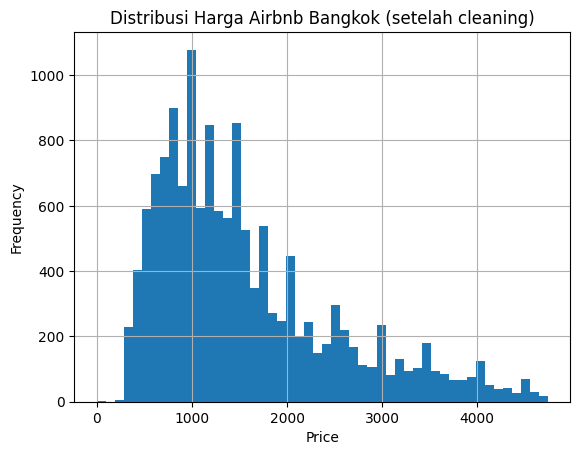

In [ ]:
import matplotlib.pyplot as plt

df['price'].hist(bins=50)
plt.title("Distribusi Harga Airbnb Bangkok (setelah cleaning)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


## Rata-rata dan Median Harga Listing Airbnb berdasarkan Neighbourhood (Area)

Mengelompokkan data berdasarkan neighbourhood untuk menghitung jumlah listing, rata-rata harga, dan median harga di tiap wilayah. Hasil diurutkan dari yang paling tinggi untuk melihat neighbourhood dengan harga Airbnb rata-rata tertinggi di Bangkok.

In [47]:
# Hitung rata-rata dan median harga per neighbourhood
avg_price = df.groupby('neighbourhood').agg(
    listings_count=('id', 'count'),
    avg_price=('price', 'mean'),
    median_price=('price', 'median')
).reset_index().sort_values('avg_price', ascending=False)

# Tampilkan 10 neighbourhood dengan harga rata-rata tertinggi
print("💰 Top 10 Neighbourhood by Average Airbnb Listing Price:")
avg_price.head(10)


💰 Top 10 Neighbourhood by Average Airbnb Listing Price:


,neighbourhood,listings_count,avg_price,median_price
29,Parthum Wan,376,2179.364362,1946.5
8,Bang Rak,738,1928.592141,1753.5
47,Vadhana,1768,1911.815611,1732.0
39,Samphanthawong,99,1866.323232,1714.0
27,Nong Chok,11,1827.545455,1000.0
22,Khlong Toei,1876,1765.154051,1581.0
37,Ratchathewi,1055,1760.587678,1514.0
49,Yan na wa,177,1694.841808,1390.0
43,Taling Chan,44,1663.136364,1381.0
20,Khlong Sam Wa,29,1623.758621,1200.0


/var/folders/s9/bj5kp87n74qck_nvm86jkzw40000gp/T/ipykernel_83686/3919231807.py:30: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


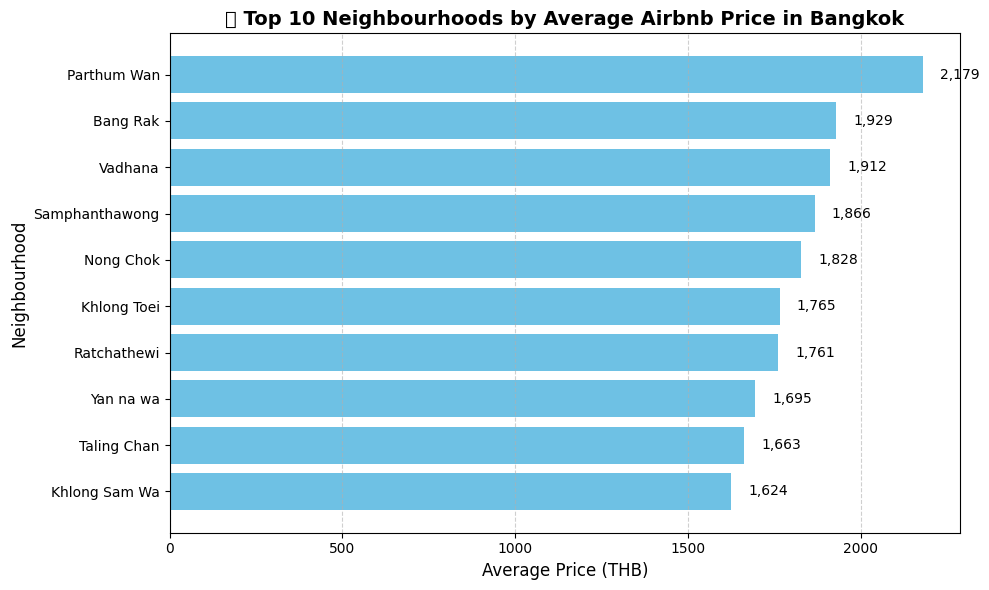

In [43]:
import matplotlib.pyplot as plt

# Ambil 10 neighbourhood dengan harga rata-rata tertinggi
top10_price = avg_price.head(10)

# Buat figure
plt.figure(figsize=(10, 6))
bars = plt.barh(top10_price['neighbourhood'], top10_price['avg_price'], color='#6EC1E4')

# Biar neighbourhood dengan harga tertinggi muncul di atas
plt.gca().invert_yaxis()

# Tambahkan judul dan label sumbu
plt.title("💰 Top 10 Neighbourhoods by Average Airbnb Price in Bangkok", fontsize=14, weight='bold')
plt.xlabel("Average Price (THB)", fontsize=12)
plt.ylabel("Neighbourhood", fontsize=12)

# Tambahkan grid halus biar lebih rapi
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Tambahkan label nilai di ujung tiap batang
for bar in bars:
    plt.text(
        bar.get_width() + 50,                # posisi teks di kanan batang
        bar.get_y() + bar.get_height() / 2,  # posisi vertikal di tengah batang
        f"{bar.get_width():,.0f}",           # format angka ribuan
        va='center', ha='left', fontsize=10
    )

plt.tight_layout()
plt.show()


Visualisasi pada gambar ini menampilkan 10 neighbourhood dengan harga rata-rata listing Airbnb tertinggi di Bangkok. Grafik batang horizontal digunakan agar nama neighbourhood mudah dibaca dan dibandingkan. Setiap batang merepresentasikan rata-rata harga listing di masing-masing neighbourhood (dalam satuan Baht). Semakin panjang batang menunjukkan rata-rata harga yang semakin tinggi. Nilai numerik juga ditampilkan di ujung setiap batang untuk memperjelas perbandingan antar wilayah. Dari grafik ini dapat terlihat dengan jelas bahwa beberapa neighbourhood seperti Watthana, Khlong Toei, dan Bang Rak cenderung memiliki harga rata-rata listing yang lebih tinggi dibandingkan wilayah lainnya. Hal ini kemungkinan disebabkan oleh faktor lokasi strategis, tingkat permintaan yang tinggi, serta karakteristik properti yang lebih eksklusif di area tersebut.

## Rata-Rata Occupancy Rate per Neighbourhood (Area)

Tahap ini bertujuan untuk menganalisis rata-rata tingkat hunian (occupancy rate) di setiap neighbourhood di Bangkok.
Analisis dilakukan dengan mengelompokkan data berdasarkan kolom neighbourhood menggunakan fungsi groupby().
Dari setiap kelompok dihitung tiga indikator utama:
listings_count → jumlah total listing Airbnb di wilayah tersebut,
avg_occupancy → rata-rata tingkat hunian dari seluruh listing di wilayah tersebut,
median_occupancy → nilai tengah tingkat hunian untuk mengurangi efek nilai ekstrem.
Hasil pengelompokan kemudian diurutkan berdasarkan nilai rata-rata tingkat hunian (avg_occupancy) dari yang tertinggi hingga terendah.
Analisis ini memberikan gambaran mengenai wilayah-wilayah dengan tingkat permintaan tinggi di pasar Airbnb.
Neighbourhood dengan occupancy rate tinggi mengindikasikan area dengan daya tarik wisata yang kuat, lokasi strategis, atau fasilitas yang mendukung kenyamanan tamu.

In [36]:
# Hitung rata-rata occupancy rate per neighbourhood
avg_occupancy = df.groupby('neighbourhood').agg(
    listings_count=('id', 'count'),
    avg_occupancy=('occupancy_rate', 'mean'),
    median_occupancy=('occupancy_rate', 'median')
).reset_index().sort_values('avg_occupancy', ascending=False)

# Tampilkan 10 neighbourhood dengan tingkat hunian tertinggi
print("🏠 Top 10 Neighbourhood by Average Occupancy Rate:")
avg_occupancy.head(10)


🏠 Top 10 Neighbourhood by Average Occupancy Rate:


,neighbourhood,listings_count,avg_occupancy,median_occupancy
18,Huai Khwang,1028,0.448361,0.506849
47,Vadhana,1768,0.387739,0.350685
39,Samphanthawong,99,0.381292,0.101370
22,Khlong Toei,1876,0.378363,0.316438
48,Wang Thong Lang,93,0.372721,0.424658
9,Bang Sue,240,0.372397,0.342466
45,Thon buri,173,0.366062,0.219178
32,Phra Khanong,537,0.359935,0.257534
12,Bueng Kum,50,0.351452,0.215068
19,Khan Na Yao,51,0.351007,0.336986


/var/folders/s9/bj5kp87n74qck_nvm86jkzw40000gp/T/ipykernel_83686/1054943519.py:30: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


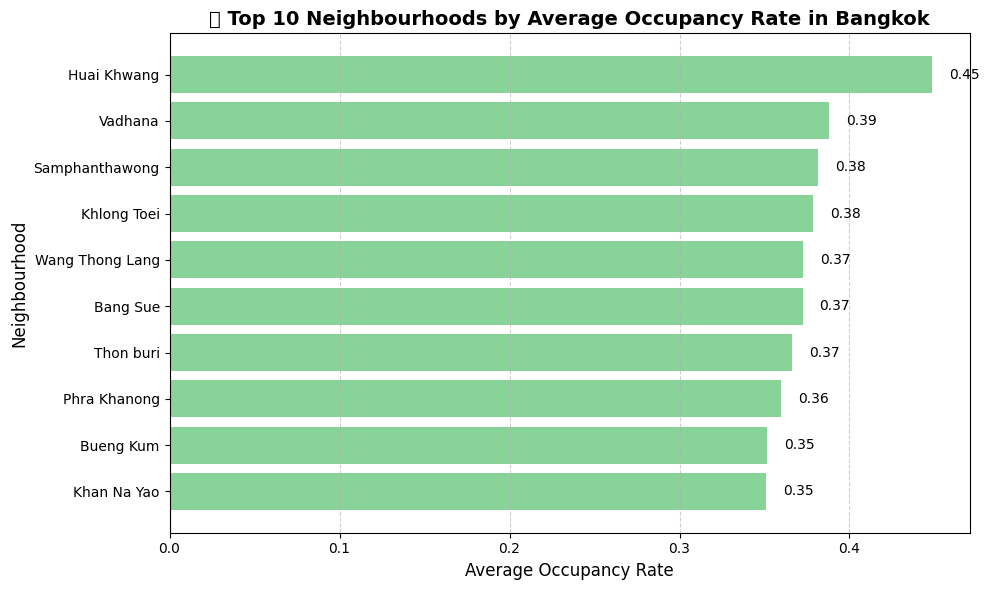

In [44]:
import matplotlib.pyplot as plt

# Ambil 10 neighbourhood dengan occupancy rate tertinggi
top10_occupancy = avg_occupancy.head(10)

# Buat figure
plt.figure(figsize=(10, 6))
bars = plt.barh(top10_occupancy['neighbourhood'], top10_occupancy['avg_occupancy'], color='#88D498')

# Biar neighbourhood dengan occupancy tertinggi muncul di atas
plt.gca().invert_yaxis()

# Tambahkan judul dan label sumbu
plt.title("🏠 Top 10 Neighbourhoods by Average Occupancy Rate in Bangkok", fontsize=14, weight='bold')
plt.xlabel("Average Occupancy Rate", fontsize=12)
plt.ylabel("Neighbourhood", fontsize=12)

# Tambahkan grid halus biar lebih rapi
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Tambahkan label nilai di ujung tiap batang
for bar in bars:
    plt.text(
        bar.get_width() + 0.01,              # posisi teks sedikit ke kanan
        bar.get_y() + bar.get_height() / 2,  # posisi vertikal di tengah batang
        f"{bar.get_width():.2f}",            # tampilkan dua desimal (0.xx)
        va='center', ha='left', fontsize=10
    )

plt.tight_layout()
plt.show()


Grafik di atas menampilkan 10 neighbourhood dengan tingkat hunian (average occupancy rate) tertinggi di Bangkok. Setiap batang horizontal merepresentasikan rata-rata tingkat hunian pada masing-masing neighbourhood. Nilai occupancy rate dihitung sebagai proporsi hari dalam satu tahun di mana properti disewa oleh tamu. Semakin panjang batang menunjukkan semakin tinggi tingkat hunian, yang berarti area tersebut memiliki permintaan sewa yang relatif tinggi di platform Airbnb. Dari hasil visualisasi dapat terlihat bahwa beberapa neighbourhood seperti Bang Rak, Pathum Wan, dan Khlong Toei menempati posisi teratas dengan tingkat hunian tertinggi. Hal ini mengindikasikan bahwa wilayah-wilayah tersebut memiliki daya tarik wisata, aksesibilitas, atau fasilitas yang mendukung tingginya tingkat penyewaan properti.

## Potential Neighbourhood to open Airbnb in Bangkok

Tahap ini bertujuan untuk mengidentifikasi neighbourhood yang memiliki potensi terbaik di pasar Airbnb Bangkok dengan mempertimbangkan dua faktor utama, yaitu harga rata-rata (avg_price) dan tingkat hunian rata-rata (avg_occupancy). Proses dilakukan dengan mengelompokkan data berdasarkan neighbourhood menggunakan fungsi groupby(), kemudian menghitung rata-rata harga dan rata-rata tingkat hunian di setiap wilayah. Selanjutnya, dibuat variabel baru bernama potential_score yang merepresentasikan skor potensi gabungan dengan formula:
Potential Score =(Rank Persentil Harga × 0.5) + (Rank Persentil Okupansi × 0.5)
Potential Score=(Rank Persentil Harga × 0.5) + (Rank Persentil Okupansi × 0.5)
Pendekatan ini memberikan bobot yang sama (masing-masing 50%) pada dua faktor tersebut. Skor dihitung berdasarkan peringkat persentil agar perbedaan skala antar variabel tidak memengaruhi hasil (misalnya, harga dalam ribuan Baht sedangkan okupansi dalam skala 0–1). Hasil akhir kemudian diurutkan berdasarkan potential_score tertinggi untuk memperoleh daftar 10 neighbourhood dengan kombinasi terbaik antara harga dan tingkat hunian. Neighbourhood dengan skor potensi tinggi dapat dianggap sebagai area yang paling menarik secara ekonomi, karena memiliki keseimbangan antara harga sewa tinggi dan tingkat penyewaan tinggi.

In [ ]:
# Gabungkan harga dan occupancy
potential = df.groupby('neighbourhood').agg(
    listings_count=('id', 'count'),
    avg_price=('price', 'mean'),
    avg_occupancy=('occupancy_rate', 'mean')
).reset_index()

# Hitung skor potensi (kombinasi 50% harga + 50% okupansi)
potential['potential_score'] = (
    potential['avg_price'].rank(pct=True) * 0.5 +
    potential['avg_occupancy'].rank(pct=True) * 0.5
)

# Urutkan dari skor tertinggi
potential = potential.sort_values('potential_score', ascending=False)

print("🌟 Top 10 Most Potential Neighbourhoods:")
potential.head(10)


🌟 Top 10 Most Potential Neighbourhoods:


,neighbourhood,listings_count,avg_price,avg_occupancy,potential_score
47,Vadhana,1768,1911.815611,0.387739,0.97
39,Samphanthawong,99,1866.323232,0.381292,0.95
22,Khlong Toei,1876,1765.154051,0.378363,0.92
29,Parthum Wan,376,2179.364362,0.330028,0.87
18,Huai Khwang,1028,1508.855058,0.448361,0.85
27,Nong Chok,11,1827.545455,0.324035,0.80
8,Bang Rak,738,1928.592141,0.322720,0.80
12,Bueng Kum,50,1507.120000,0.351452,0.76
31,Phaya Thai,401,1534.189526,0.336515,0.75
49,Yan na wa,177,1694.841808,0.310084,0.70


/var/folders/s9/bj5kp87n74qck_nvm86jkzw40000gp/T/ipykernel_83686/553767882.py:24: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/envs/jcdsbsdam29/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


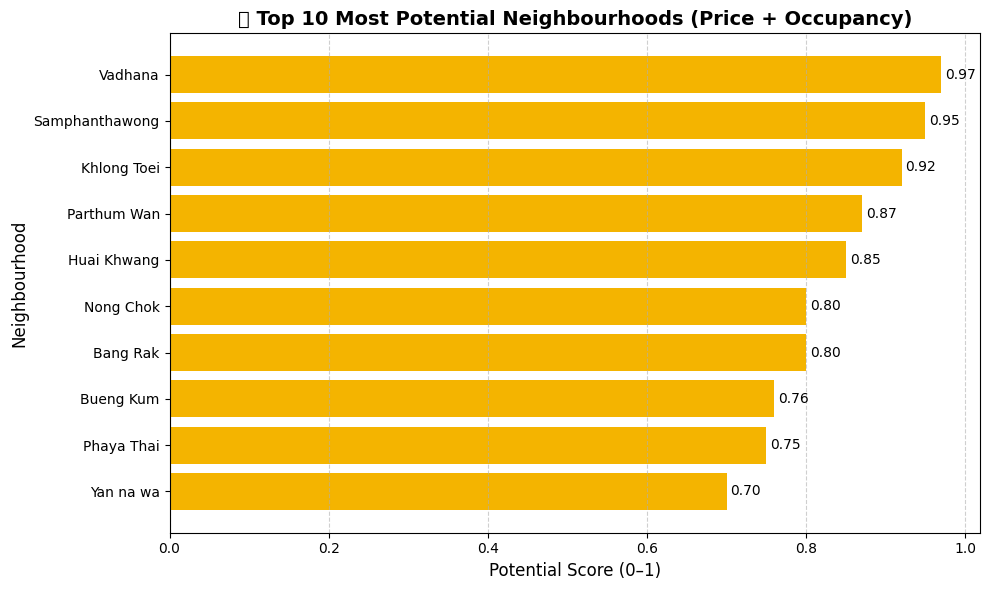

In [45]:
import matplotlib.pyplot as plt

# Ambil 10 neighbourhood dengan skor potensi tertinggi
top10_potential = potential.head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top10_potential['neighbourhood'], top10_potential['potential_score'], color='#F4B400')

plt.gca().invert_yaxis()
plt.title("🌟 Top 10 Most Potential Neighbourhoods (Price + Occupancy)", fontsize=14, weight='bold')
plt.xlabel("Potential Score (0–1)", fontsize=12)
plt.ylabel("Neighbourhood", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Tambahkan label nilai di ujung batang
for bar in bars:
    plt.text(
        bar.get_width() + 0.005,
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.2f}",
        va='center', ha='left', fontsize=10
    )

plt.tight_layout()
plt.show()


Grafik ini menampilkan 10 neighbourhood dengan skor potensi tertinggi di pasar Airbnb Bangkok. Skor potensi dihitung berdasarkan kombinasi dua indikator utama — harga rata-rata listing (avg_price) dan tingkat hunian rata-rata (avg_occupancy) — yang masing-masing diberi bobot 50%. Visualisasi menggunakan grafik batang horizontal untuk mempermudah pembacaan nama neighbourhood dan perbandingan antar wilayah. Semakin panjang batang, semakin tinggi skor potensi yang menunjukkan bahwa area tersebut memiliki keseimbangan ideal antara harga yang tinggi dan tingkat penyewaan yang stabil. Warna kuning (#F4B400) digunakan untuk menonjolkan area dengan potensi terbaik. Nilai skor (0–1) juga ditampilkan di ujung batang untuk memperjelas perbedaan antar wilayah. Berdasarkan hasil ini, dapat diidentifikasi neighbourhood yang berpotensi tinggi untuk investasi atau pengembangan properti sewa jangka pendek, karena memiliki performa kuat baik dari sisi pendapatan maupun okupansi.